In [84]:
#import libraries
import numpy as np 
import pandas as pd 
import tensorflow as tf 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA,TruncatedSVD
import time 


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced

from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score,classification_report
from collections import Counter
from sklearn.model_selection import KFold,StratifiedKFold
import warnings
warnings.filterwarnings('ignore')


In [85]:
df=pd.read_csv('train.csv')
df.head()

,id,Time,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,...,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,Transaction_Amount,IsFraud
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0


In [86]:
df.describe()

,id,Time,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,...,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,Transaction_Amount,IsFraud
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,49785.422340,0.069456,-0.003674,0.739860,0.104810,-0.254623,0.151934,-0.165443,0.166254,...,-0.032077,-0.068876,-0.059646,-0.000776,0.161152,0.021575,0.014138,0.020323,71.065194,0.001793
std,43301.414527,18733.655609,1.346553,1.161502,1.012801,1.230909,1.048268,1.182964,0.802668,0.691267,...,0.404916,0.573755,0.323272,0.584270,0.385175,0.473795,0.223692,0.163429,158.712510,0.042310
min,0.000000,0.000000,-22.173926,-44.247914,-19.088980,-5.069484,-21.090735,-25.659750,-31.179799,-28.903442,...,-14.689621,-7.351378,-11.958588,-2.827444,-3.958591,-1.413857,-9.234767,-4.454059,0.000000,0.000000
25%,37499.750000,39411.000000,-0.844248,-0.621724,0.181373,-0.738399,-0.912254,-0.590892,-0.667139,-0.078114,...,-0.185077,-0.464426,-0.177546,-0.321495,-0.078682,-0.310948,-0.044800,0.001623,6.990000,0.000000
50%,74999.500000,53785.000000,0.671327,0.003677,0.826497,0.095342,-0.322525,-0.068690,-0.144551,0.125052,...,-0.044828,-0.045844,-0.068170,0.043048,0.181701,-0.087927,0.017590,0.024098,24.900000,0.000000
75%,112499.250000,63833.000000,1.171271,0.753340,1.360362,0.967657,0.242796,0.492931,0.334553,0.396056,...,0.100896,0.309938,0.047399,0.388969,0.425791,0.269844,0.073776,0.065778,74.000000,0.000000
max,149999.000000,73899.000000,2.390816,16.068473,6.145578,12.547997,34.581260,15.082516,23.256066,18.270586,...,22.062945,6.163541,12.734391,4.572739,3.111624,3.119824,6.457839,23.263746,6513.350000,1.000000


In [87]:
df.isnull().sum()

id                    0
Time                  0
feat1                 0
feat2                 0
feat3                 0
feat4                 0
feat5                 0
feat6                 0
feat7                 0
feat8                 0
feat9                 0
feat10                0
feat11                0
feat12                0
feat13                0
feat14                0
feat15                0
feat16                0
feat17                0
feat18                0
feat19                0
feat20                0
feat21                0
feat22                0
feat23                0
feat24                0
feat25                0
feat26                0
feat27                0
feat28                0
Transaction_Amount    0
IsFraud               0
dtype: int64

In [88]:
df.columns

Index(['id', 'Time', 'feat1', 'feat2', 'feat3', 'feat4', 'feat5', 'feat6',
       'feat7', 'feat8', 'feat9', 'feat10', 'feat11', 'feat12', 'feat13',
       'feat14', 'feat15', 'feat16', 'feat17', 'feat18', 'feat19', 'feat20',
       'feat21', 'feat22', 'feat23', 'feat24', 'feat25', 'feat26', 'feat27',
       'feat28', 'Transaction_Amount', 'IsFraud'],
      dtype='object')

In [89]:
print('No frauds value is {} %'.format(round(df['IsFraud'].value_counts()[0]/len(df)*100,2)))
print('frauds value is {} %'.format(round(df['IsFraud'].value_counts()[1]/len(df)*100,2)))
print(df['IsFraud'].value_counts())

No frauds value is 99.82 %
frauds value is 0.18 %
IsFraud
0    149731
1       269
Name: count, dtype: int64


Our original dataset is so imbalanced. Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit and for the reason of that our model will will predict the wrong result.

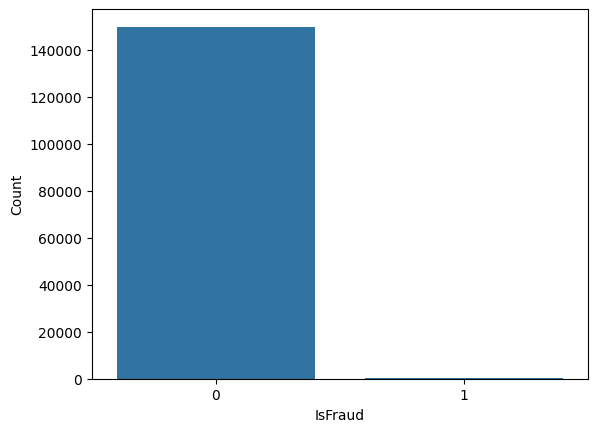

In [90]:
sns.countplot(x='IsFraud', data=df)
plt.xlabel('IsFraud')
plt.ylabel('Count')
plt.show()

For the sake of that we will subsample of the dataframe.Our subsample will be a dataframe with equal amount of fraud and non-fraud cases.

There are 269 cases of fraud in our dataset so we can randomly get 269 cases of non-fraud to create our new sub dataframe.
We concat the 269 cases of fraud and non fraud, creating a new sub-sample.

In [91]:
from sklearn.preprocessing import StandardScaler,RobustScaler
std_scaler=StandardScaler()
rob_scaler=RobustScaler()

df['scaled_amount']=rob_scaler.fit_transform(df['Transaction_Amount'].values.reshape(-1,1))
df['scaled_time']=rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Transaction_Amount'], axis=1, inplace=True)

In [92]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(1, 'scaled_amount', scaled_amount)
df.insert(2, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,id,scaled_amount,scaled_time,feat1,feat2,feat3,feat4,feat5,feat6,feat7,...,feat20,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,IsFraud
0,0,-0.342039,-2.202318,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,...,-0.292969,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,0
1,1,0.881958,-2.202318,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,...,0.065717,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,0
2,2,-0.331443,-2.202318,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,...,-0.021375,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,0
3,3,-0.356663,-2.202318,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,...,-0.340089,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,0
4,4,-0.356663,-2.202318,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,...,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,0


In [94]:
column=['IsFraud','id']
X=df.drop(column,axis=1)
y=df['IsFraud']

sss=StratifiedKFold(n_splits=5,random_state=None,shuffle=False)
for train_index, test_index in sss.split(X,y):
    print("Train :",train_index, "Test:",test_index)
    original_Xtrain, original_Xtest=X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest=y.iloc[train_index], y.iloc[test_index]
    
    
    
# turn into an array 
original_Xtrain=original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

#both train and test label are similarly distributed 
train_uniqe_label,train_counts_label=np.unique(original_ytrain, return_counts=True)
test_uniqe_label,test_counts_label=np.unique(original_ytest, return_counts=True)


print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))
    

Train : [ 20271  21556  21641 ... 149997 149998 149999] Test: [    0     1     2 ... 30009 30010 30011]
Train : [     0      1      2 ... 149997 149998 149999] Test: [20271 21556 21641 ... 60001 60002 60003]
Train : [     0      1      2 ... 149997 149998 149999] Test: [58529 58966 59146 ... 90005 90006 90007]
Train : [     0      1      2 ... 149997 149998 149999] Test: [ 85810  86150  86658 ... 119997 119998 120996]
Train : [     0      1      2 ... 119997 119998 120996] Test: [119999 120000 120001 ... 149997 149998 149999]
Label Distributions: 

[0.99820833 0.00179167]
[0.9982 0.0018]


we use now random under sampling.

#steps:

1.The first thing we have to do is determine how imbalanced is our class (use "value_counts()" on the class column to determine the amount for each label)

2.Once we determine how many instances are considered fraud transactions (Fraud = "1") , we should bring the non-fraud transactions to the same amount as fraud transactions (assuming we want a 50/50 ratio), this will be equivalent to 269 cases of fraud and 269 cases of non-fraud transactions.

3.After implementing this technique, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes. Then the next step we will implement is to shuffle the data to see if our models can maintain a certain accuracy everytime we run this script.

Note: The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss (bringing 269 non-fraud transaction)


In [95]:
df=df.sample(frac=1)

fraud_df=df.loc[df['IsFraud']==1]
non_fraud_df=df.loc[df['IsFraud']==0][:269]

normal_distributed_df=pd.concat([fraud_df,non_fraud_df])

#shuffle dataframe rows 
new_df=normal_distributed_df.sample(frac=1,random_state=42)
new_df.head()

,id,scaled_amount,scaled_time,feat1,feat2,feat3,feat4,feat5,feat6,feat7,...,feat20,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,IsFraud
75799,75799,1.161767,0.005282,-1.119068,0.004487,1.782949,-3.058632,-0.485066,-1.268815,1.339577,...,-0.069194,0.067233,0.640870,0.004818,0.641758,0.715367,-0.839909,-0.377030,-0.319839,0
9883,9883,0.068646,-1.753869,1.154899,0.085500,0.490785,0.498845,-0.223498,-0.061918,-0.317016,...,-0.078780,-0.010914,0.183918,-0.002450,-0.077267,0.215859,0.599491,-0.051808,-0.005406,1
67152,67152,-0.126847,-0.083613,-0.853241,-0.233906,1.887859,-2.790825,-1.037480,-0.159909,-0.685021,...,-0.233358,-0.120889,-0.128598,-0.373679,-0.501686,0.465964,-0.069731,-0.125566,0.034814,0
39444,39444,6.825250,-0.555565,-1.180125,-0.488026,1.174826,4.086589,-0.814654,0.296867,1.751625,...,1.143480,0.491645,0.284429,1.233938,0.430045,-0.566691,0.114529,-0.100935,0.132678,1
76386,76386,1.105656,0.016215,1.194700,-0.034593,-0.237748,0.067781,0.266420,-0.566978,0.371551,...,0.222948,-0.372515,-1.140965,-0.061770,-0.515554,0.283668,0.502915,-0.091865,0.017967,0


In [96]:
print('Distribution of the classes in the subsample dataset')
print(new_df['IsFraud'].value_counts()/len(new_df))


Distribution of the classes in the subsample dataset
IsFraud
0    0.5
1    0.5
Name: count, dtype: float64


In [97]:
new_df.shape

(538, 32)

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [134]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

best_score = 0
best_classifier_name = ""

classifiers = {
    "LogisticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}


# Define parameter grids for each classifier
param_grid = {
    "LogisticRegression": {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga']
    },
    "KNearest": {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    "Support Vector Classifier": {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf']
    },
    "DecisionTreeClassifier": {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30]
    }
}

# Perform grid search for each classifier
for classifier_name, classifier in classifiers.items():
    param_grid_classifier = param_grid[classifier_name]
    grid_search = GridSearchCV(classifier, param_grid_classifier, cv=5)
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters for {classifier_name} :")
    print(grid_search.best_params_)
    print(f"Best score for {classifier_name}: {grid_search.best_score_}")
    print("\n")
    
 # Check if the current classifier has the best score
    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_classifier_name = classifier_name

print(f"Best classifier: {best_classifier_name}")

# Now, use the best classifier to make predictions
best_classifier = classifiers[best_classifier_name]
best_classifier.fit(X_train, y_train)  # Train the best classifier on the entire training set
y_pred = best_classifier.predict(X_test)  # Make predictions on the test set


Best parameters for LogisticRegression :
{'C': 1, 'solver': 'liblinear'}
Best score for LogisticRegression: 0.7069767441860465


Best parameters for KNearest :
{'n_neighbors': 5, 'weights': 'uniform'}
Best score for KNearest: 0.6697674418604651


Best parameters for Support Vector Classifier :
{'C': 1, 'kernel': 'rbf'}
Best score for Support Vector Classifier: 0.7093023255813954


Best parameters for DecisionTreeClassifier :
{'criterion': 'entropy', 'max_depth': 20}
Best score for DecisionTreeClassifier: 0.6581395348837209


Best classifier: Support Vector Classifier


In [136]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)



Precision: 0.8717948717948718
Recall: 0.5396825396825397
F1-score: 0.6666666666666666
AUC: 0.7142857142857142


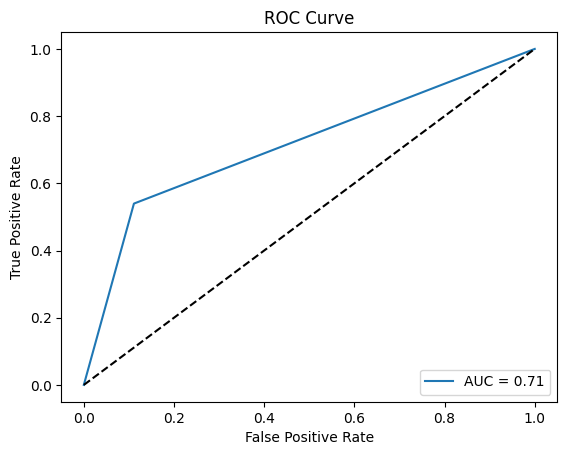

In [137]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [138]:
df_test=pd.read_csv('test.csv')
df_test.head()

,id,Time,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,...,feat20,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,Transaction_Amount
0,150000,73899,-0.681234,-0.371212,0.385966,0.955703,2.064078,0.338827,-0.539452,-0.254046,...,0.183560,-0.253324,0.266668,-0.153829,0.455969,-0.503628,0.257588,-0.456685,-0.298919,30.42
1,150001,73899,-1.098947,-0.959377,0.324934,0.703908,1.090582,-1.595909,0.584548,0.260069,...,0.334764,0.130108,0.676928,-0.161070,-0.638011,-0.273424,0.711132,0.349967,0.141233,23.00
2,150002,73899,0.977029,-0.270984,0.471526,-1.232570,0.957537,-0.636602,-0.953060,-1.491744,...,0.355728,0.517912,1.175087,-0.325895,-0.362636,0.306037,0.004828,0.037389,0.058222,198.00
3,150003,73900,1.176658,-0.225816,-0.246600,0.015513,1.103831,1.229516,-1.527098,-0.459769,...,-0.152613,-0.104600,0.003800,-0.023180,-0.458338,0.481427,-0.381415,0.080165,0.027372,9.99
4,150004,73900,0.804828,-0.272967,0.959910,-1.117567,0.395748,0.589855,1.059880,-1.101203,...,-0.127818,-0.011849,0.078540,-0.241700,0.010130,0.302614,-0.259568,0.023127,0.056957,239.00


In [139]:
df_test.shape

(69129, 31)

In [140]:
from sklearn.preprocessing import StandardScaler,RobustScaler
std_scaler=StandardScaler()
rob_scaler=RobustScaler()

df_test['scaled_amount']=rob_scaler.fit_transform(df_test['Transaction_Amount'].values.reshape(-1,1))
df_test['scaled_time']=rob_scaler.fit_transform(df_test['Time'].values.reshape(-1,1))

df_test.drop(['Time','Transaction_Amount'], axis=1, inplace=True)


In [141]:
scaled_amount = df_test['scaled_amount']
scaled_time = df_test['scaled_time']

df_test.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df_test.insert(1, 'scaled_amount', scaled_amount)
df_test.insert(2, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df_test.head()

,id,scaled_amount,scaled_time,feat1,feat2,feat3,feat4,feat5,feat6,feat7,...,feat19,feat20,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28
0,150000,0.239342,-0.426296,-0.681234,-0.371212,0.385966,0.955703,2.064078,0.338827,-0.539452,...,0.919230,0.183560,-0.253324,0.266668,-0.153829,0.455969,-0.503628,0.257588,-0.456685,-0.298919
1,150001,0.097496,-0.426296,-1.098947,-0.959377,0.324934,0.703908,1.090582,-1.595909,0.584548,...,-0.456465,0.334764,0.130108,0.676928,-0.161070,-0.638011,-0.273424,0.711132,0.349967,0.141233
2,150002,3.442936,-0.426296,0.977029,-0.270984,0.471526,-1.232570,0.957537,-0.636602,-0.953060,...,0.166645,0.355728,0.517912,1.175087,-0.325895,-0.362636,0.306037,0.004828,0.037389,0.058222
3,150003,-0.151214,-0.426248,1.176658,-0.225816,-0.246600,0.015513,1.103831,1.229516,-1.527098,...,-0.049557,-0.152613,-0.104600,0.003800,-0.023180,-0.458338,0.481427,-0.381415,0.080165,0.027372
4,150004,4.226725,-0.426248,0.804828,-0.272967,0.959910,-1.117567,0.395748,0.589855,1.059880,...,-1.335861,-0.127818,-0.011849,0.078540,-0.241700,0.010130,0.302614,-0.259568,0.023127,0.056957


In [142]:
X_test_new=df_test.drop('id',axis=1)

In [144]:
df_test['IsFraud']=best_classifier.predict(X_test_new)

In [145]:
print(df_test['IsFraud'].shape)
print(df_test.shape)

(69129,)
(69129, 32)


In [146]:
df_test.head()

,id,scaled_amount,scaled_time,feat1,feat2,feat3,feat4,feat5,feat6,feat7,...,feat20,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,IsFraud
0,150000,0.239342,-0.426296,-0.681234,-0.371212,0.385966,0.955703,2.064078,0.338827,-0.539452,...,0.183560,-0.253324,0.266668,-0.153829,0.455969,-0.503628,0.257588,-0.456685,-0.298919,0
1,150001,0.097496,-0.426296,-1.098947,-0.959377,0.324934,0.703908,1.090582,-1.595909,0.584548,...,0.334764,0.130108,0.676928,-0.161070,-0.638011,-0.273424,0.711132,0.349967,0.141233,0
2,150002,3.442936,-0.426296,0.977029,-0.270984,0.471526,-1.232570,0.957537,-0.636602,-0.953060,...,0.355728,0.517912,1.175087,-0.325895,-0.362636,0.306037,0.004828,0.037389,0.058222,0
3,150003,-0.151214,-0.426248,1.176658,-0.225816,-0.246600,0.015513,1.103831,1.229516,-1.527098,...,-0.152613,-0.104600,0.003800,-0.023180,-0.458338,0.481427,-0.381415,0.080165,0.027372,0
4,150004,4.226725,-0.426248,0.804828,-0.272967,0.959910,-1.117567,0.395748,0.589855,1.059880,...,-0.127818,-0.011849,0.078540,-0.241700,0.010130,0.302614,-0.259568,0.023127,0.056957,0


In [147]:
df_test[['id','IsFraud']].to_csv('submission.csv',index=False)
submission_data=pd.read_csv("submission.csv")
submission_data.head()

,id,IsFraud
0,150000,0
1,150001,0
2,150002,0
3,150003,0
4,150004,0
